In [1]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from ODElib import *

def f(t : float, u : Vector):
    return Vector(u[1], u[0]**2 - 1)

# first integral
def C(u : Vector):
    return (u[0]**3)/3 - u[0] - (u[1]**2)/2

def show_result(ts : list[float], us : list[Vector], C : Callable[[Vector], float]):
    fig = plt.figure(figsize=[10, 6])
    gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1])
    fig.add_subplot(gs[0, 1])
    plt.plot(ts, [u[0] for u in us], label="x(t)")
    plt.plot(ts, [u[1] for u in us], label="y(t)")
    plt.legend()
    plt.xlabel("t")
    ax_3d = fig.add_subplot(gs[0, 0], projection="3d")
    plt.plot(ts, [u[0] for u in us], [u[1] for u in us])
    plt.xlabel("t")
    plt.ylabel("x")
    ax_3d.zaxis.set_rotate_label(False) 
    ax_3d.set_zlabel("y")
    ax = fig.add_subplot(gs[1, :])
    plt.plot(ts, [C(u) - C(us[0]) for u in us], label="$C(x(t), y(t)) - C_{th}$", color="green")
    plt.hlines(0, ts[0], ts[-1], linestyle="--", dashes=(0, (2, 5)), label="C[theory]", colors="red")
    plt.legend()
    plt.xlabel("t")
    plt.ylabel("$C - C_{theory}$")
    formatter = ScalarFormatter(useMathText=True, useOffset=False)
    ax.yaxis.set_major_formatter(formatter)
    plt.tight_layout()
    plt.show()

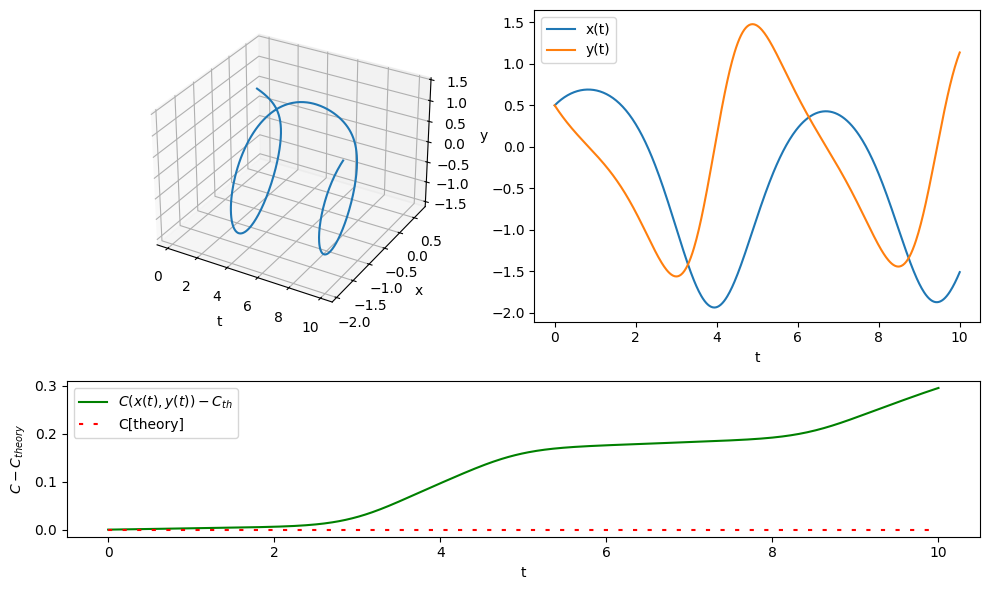

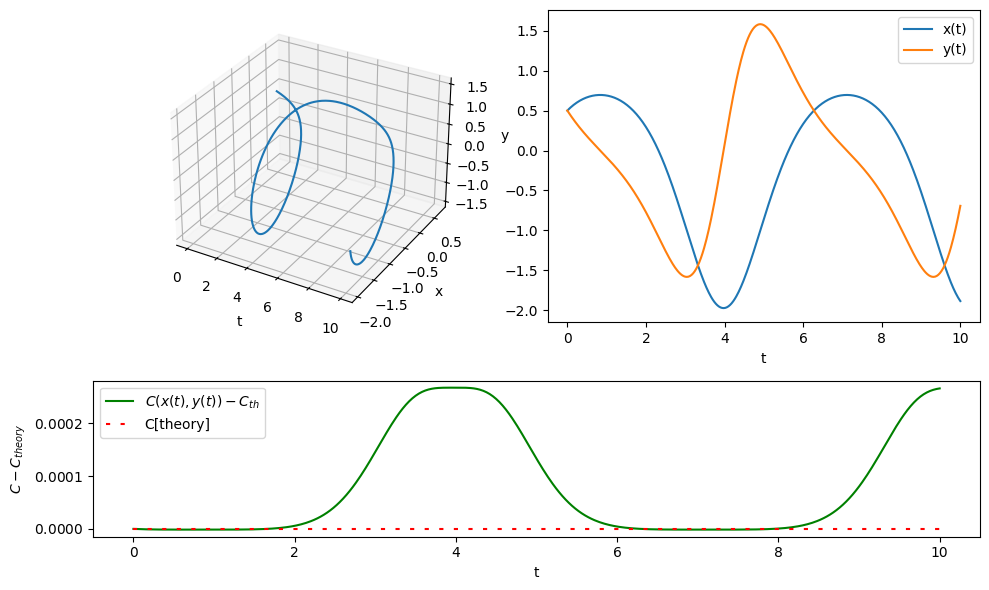

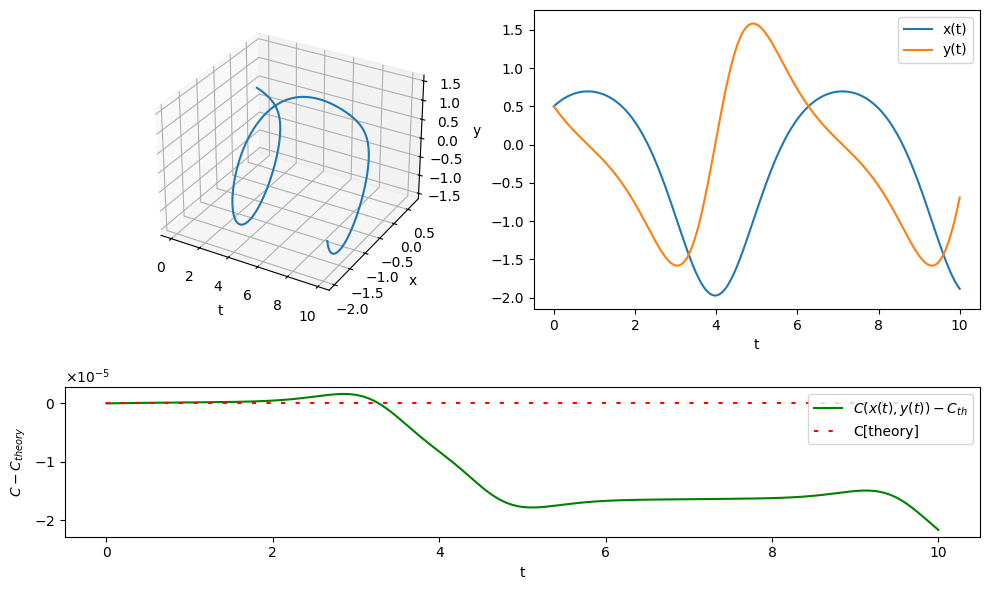

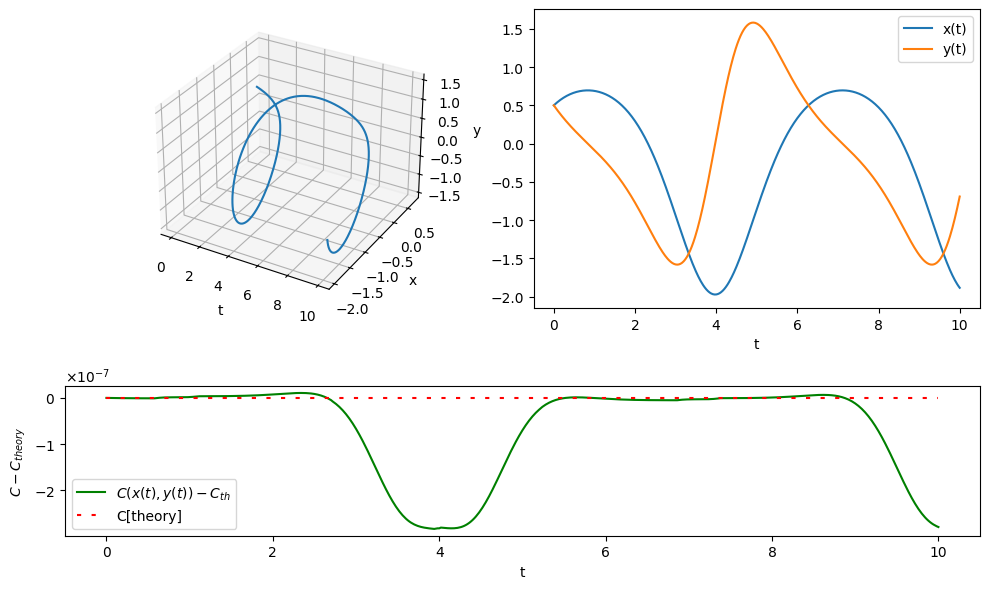

---------------------------------------------


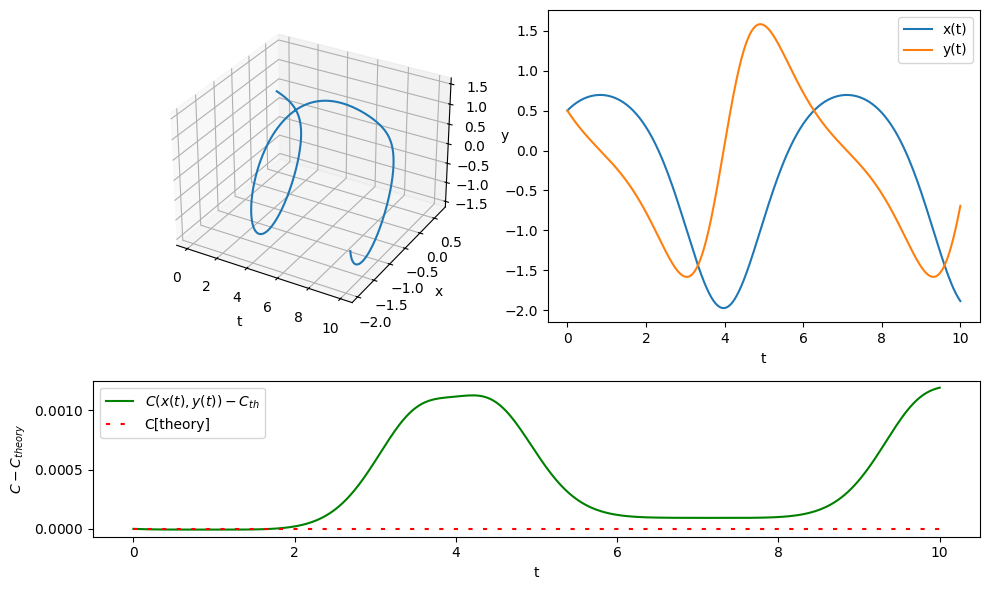

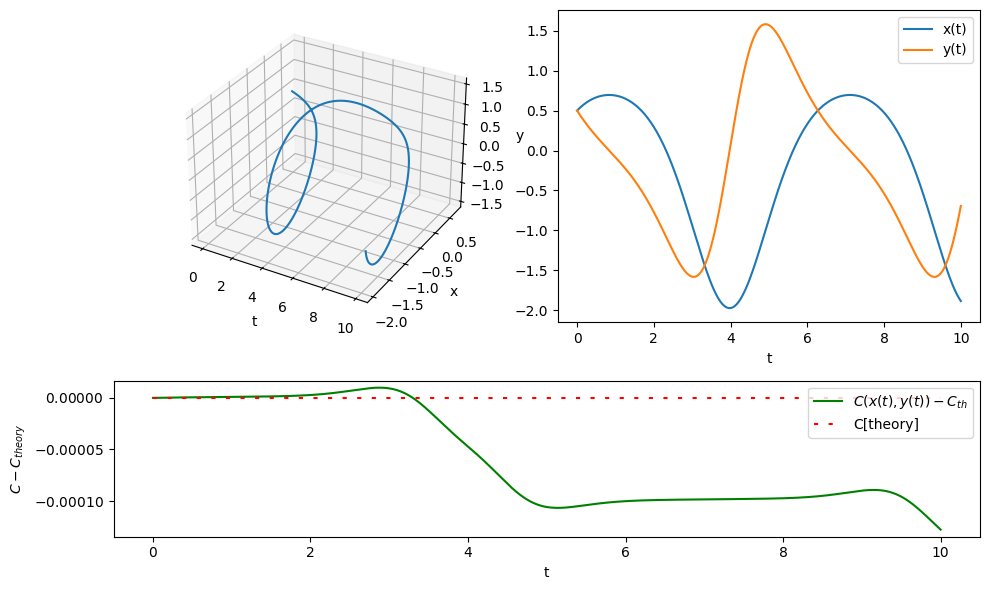

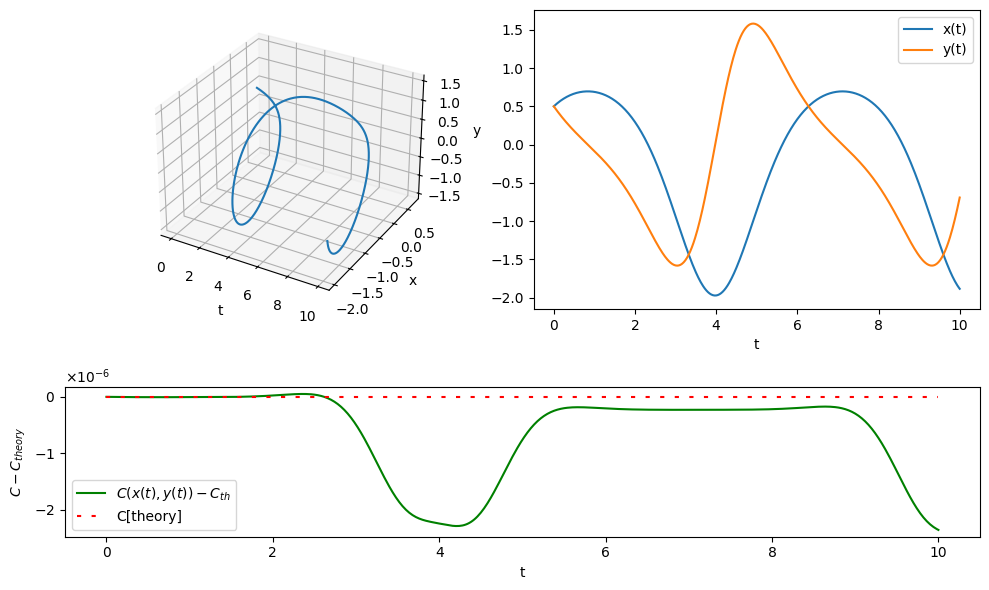

In [2]:
T = 10
h = 2e-2
N = int(T/h)
ts = [(h * n) for n in range(N + 1)]
u0 = Vector(0.5, 0.5)

# starting points
sp = RungeKuttaMethods.explicit_4_order(f, u0, h, 3)

show_result(ts, AdamsMethods.implicit_1_order(f, [u0], h, N), C)
show_result(ts, AdamsMethods.implicit_2_order(f, sp[:2], h, N), C)
show_result(ts, AdamsMethods.implicit_3_order(f, sp[:3], h, N), C)
show_result(ts, AdamsMethods.implicit_4_order(f, sp, h, N), C)
print("---------------------------------------------")
show_result(ts, BDF.implicit_2_order(f, sp[:2], h, N), C)
show_result(ts, BDF.implicit_3_order(f, sp[:3], h, N), C)
show_result(ts, BDF.implicit_4_order(f, sp, h, N), C)